In [66]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import seaborn as sns
from scipy import stats
import math

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 

income_data = pd.read_csv('data/kaggle_income.csv', engine = 'python')

In [4]:
income_data.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [67]:
#Analysis of data for graphing
mean = income_data['Mean']
mean.head()
land = income_data['ALand']
land.head()
water = income_data['AWater']
water.head()
percent_water = (water/(land + water))*100
percent_water.head()

0     7.702031
1     0.089118
2     0.578837
3     6.049256
4    96.229913
dtype: float64

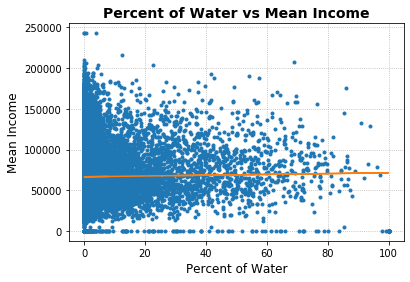

In [74]:
# Sample data
x = percent_water
y = mean

# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Percent of Water vs Mean Income',fontsize=14,fontweight='bold')
plt.xlabel('Percent of Water',fontsize=12)
plt.ylabel('Mean Income',fontsize=12)
plt.grid(linestyle='dotted')
plt.show()

In [33]:
# Calculate relevant statistical data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r: %f     p: %f     standard error: %f" % (r_value, p_value, std_err))


slope: 48.849789    intercept: 66524.022616
r: 0.017037     p: 0.002121     standard error: 15.896826


In [38]:
sorted_income = income_data.sort_values(by='Mean', ascending=False)



In [43]:
sorted_income.head()
top_sorted = sorted_income[0:100]
top_sorted

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
560,201700,2,Alaska,AK,Southeast Fairbanks Census Area,Delta Junction,Whitestone,CDP,place,99737,907,18298887,0,64.152838,-145.906385,242857,300000,25317,0.866493
3341,60224419,6,California,CA,Alameda County,San Diego,Alameda city,Track,Track,92110,619,1961071,81282,32.737719,-117.197744,242857,300000,25317,0.733187
24277,42012156,42,Pennsylvania,PA,Chester County,West Chester,Cheyney University,CDP,place,19382,484,604077,0,39.933520,-75.530306,242857,300000,25317,0.599880
56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107
18144,34024395,34,New Jersey,NJ,Atlantic County,Short Hills,Absecon city,Track,Track,7078,973,9094477,1302363,40.739665,-74.342521,216503,300000,56951,22.729221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19227,360212384,36,New York,NY,Albany County,Jericho,Albany city,Track,Track,11753,516,14668815,29514,40.807912,-73.570122,178731,203439,77908,163.284139
8075,13025003,13,Georgia,GA,Appling County,Alpharetta,Baxley city,Track,Track,30022,770,10686414,470633,34.014925,-84.245308,178362,190446,72499,118.184257
13159,24023747,24,Maryland,MD,Allegany County,Bethesda,Little Orleans,Track,Track,20814,240,4569183,14831,38.998463,-77.090612,178223,210367,83177,76.527239
2325,60215279,6,California,CA,Alameda County,San Marino,Alameda city,Track,Track,91108,626,6266421,6273,34.120246,-118.122234,178029,204164,78730,33.860501


In [44]:
#Analysis of data for graphing
mean_t = top_sorted['Mean']
mean_t.head()
land_t = top_sorted['ALand']
land_t.head()
water_t = top_sorted['AWater']
water_t.head()
percent_water_t = (water_t/(land_t + water_t))*100
percent_water_t.head()

560       0.000000
3341      3.979821
24277     0.000000
56        0.536056
18144    12.526527
dtype: float64

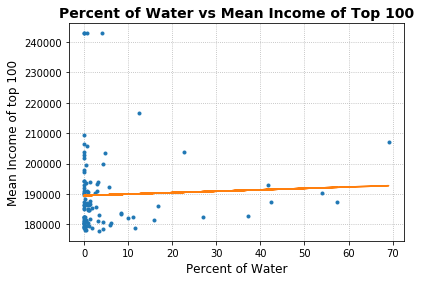

In [77]:
# Sample data
x = percent_water_t
y = mean_t

# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Percent of Water vs Mean Income of Top 100',fontsize=14,fontweight='bold')
plt.xlabel('Percent of Water',fontsize=12)
plt.ylabel('Mean Income of top 100',fontsize=12)
plt.grid(linestyle='dotted')
plt.show()

In [47]:
# Calculate relevant statistical data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r: %f     p: %f     standard error: %f" % (r_value, p_value, std_err))

slope: 46.882877    intercept: 189510.886144
r: 0.043451     p: 0.667742     standard error: 108.891179


In [52]:
total = income_data["Mean"].count()
print(total)
point_one = math.ceil(total*.001)
print(point_one)
top_one = math.ceil(total*.01)
print(top_one)
top_ten = math.ceil(total*.1)
print(top_ten)

32526
33
326
3253


In [53]:
top_point_one = sorted_income[0:point_one]
top_point_one

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
560,201700,2,Alaska,AK,Southeast Fairbanks Census Area,Delta Junction,Whitestone,CDP,place,99737,907,18298887,0,64.152838,-145.906385,242857,300000,25317,0.866493
3341,60224419,6,California,CA,Alameda County,San Diego,Alameda city,Track,Track,92110,619,1961071,81282,32.737719,-117.197744,242857,300000,25317,0.733187
24277,42012156,42,Pennsylvania,PA,Chester County,West Chester,Cheyney University,CDP,place,19382,484,604077,0,39.933520,-75.530306,242857,300000,25317,0.599880
56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107
18144,34024395,34,New Jersey,NJ,Atlantic County,Short Hills,Absecon city,Track,Track,7078,973,9094477,1302363,40.739665,-74.342521,216503,300000,56951,22.729221
20054,360219824,36,New York,NY,Albany County,Bronxville,Albany city,Track,Track,10708,914,1805685,0,40.938765,-73.823654,209392,300000,67438,59.393102
6038,120210380,12,Florida,FL,Alachua County,Miami Beach,Gainesville city,Track,Track,33139,305,1420761,3174610,25.756717,-80.140066,207128,233504,78050,21.595832
27226,480210018,48,Texas,TX,Anderson County,Dallas,Elkhart,Track,Track,75225,214,2883569,0,32.858013,-96.799359,206380,300000,63968,39.826347
30081,51024094,51,Virginia,VA,Accomack County,Leesburg,Chincoteague,Track,Track,20175,571,8876960,48623,39.096570,-77.595294,205835,300000,61701,62.158033
2910,60220539,6,California,CA,Alameda County,Huntington Beach,Alameda city,Track,Track,92648,714,3060683,897184,33.679397,-118.020316,203910,224262,68202,82.853472


In [54]:
#Analysis of data for graphing
mean_tpo = top_point_one['Mean']
mean_tpo.head()
land_tpo = top_point_one['ALand']
land_tpo.head()
water_tpo = top_point_one['AWater']
water_tpo.head()
percent_water_tpo = (water_tpo/(land_tpo + water_tpo))*100
percent_water_tpo.head()

560       0.000000
3341      3.979821
24277     0.000000
56        0.536056
18144    12.526527
dtype: float64

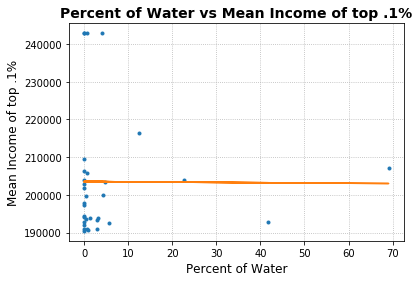

In [78]:
# Sample data
x = percent_water_tpo
y = mean_tpo

# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Percent of Water vs Mean Income of top .1%',fontsize=14,fontweight='bold')
plt.xlabel('Percent of Water',fontsize=12)
plt.ylabel('Mean Income of top .1%',fontsize=12)
plt.grid(linestyle='dotted')
plt.show()

In [56]:
# Calculate relevant statistical data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r: %f     p: %f     standard error: %f" % (r_value, p_value, std_err))

slope: -7.474417    intercept: 203517.005768
r: -0.006504     p: 0.971346     standard error: 206.411940


In [58]:
top_one_p = sorted_income[0:top_one]
#Analysis of data for graphing
mean_to = top_one_p['Mean']
mean_to.head()
land_to = top_one_p['ALand']
land_to.head()
water_to = top_one_p['AWater']
water_to.head()
percent_water_to = (water_to/(land_to + water_to))*100
percent_water_to.head()

560       0.000000
3341      3.979821
24277     0.000000
56        0.536056
18144    12.526527
dtype: float64

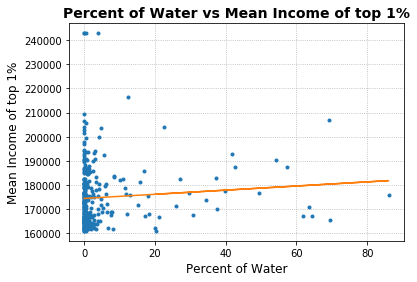

In [79]:
# Sample data
x = percent_water_to
y = mean_to

# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Percent of Water vs Mean Income of top 1%',fontsize=14,fontweight='bold')
plt.xlabel('Percent of Water',fontsize=12)
plt.ylabel('Mean Income of top 1%',fontsize=12)
plt.grid(linestyle='dotted')
plt.show()

In [60]:
# Calculate relevant statistical data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r: %f     p: %f     standard error: %f" % (r_value, p_value, std_err))

slope: 85.498238    intercept: 174511.788136
r: 0.080422     p: 0.147384     standard error: 58.870674


In [61]:
top_ten_p = sorted_income[0:top_ten]
#Analysis of data for graphing
mean_tt = top_ten_p['Mean']
mean_tt.head()
land_tt = top_ten_p['ALand']
land_tt.head()
water_tt = top_ten_p['AWater']
water_tt.head()
percent_water_tt = (water_tt/(land_tt + water_tt))*100
percent_water_tt.head()

560       0.000000
3341      3.979821
24277     0.000000
56        0.536056
18144    12.526527
dtype: float64

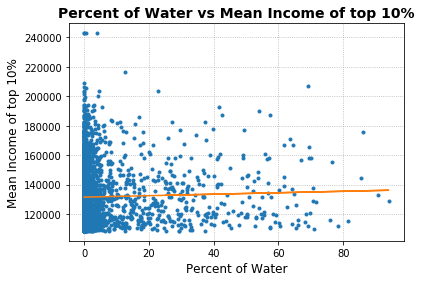

In [80]:
# Sample data
x = percent_water_tt
y = mean_tt

# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Percent of Water vs Mean Income of top 10%',fontsize=14,fontweight='bold')
plt.xlabel('Percent of Water',fontsize=12)
plt.ylabel('Mean Income of top 10%',fontsize=12)
plt.grid(linestyle='dotted')
plt.show()

In [63]:
# Calculate relevant statistical data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r: %f     p: %f     standard error: %f" % (r_value, p_value, std_err))

slope: 49.671811    intercept: 131517.427477
r: 0.029493     p: 0.092599     standard error: 29.525407


In [71]:
pop = top_ten_p["sum_w"]/top_ten_p["Mean"]
pop.head()

560      0.000004
3341     0.000003
24277    0.000002
56       0.000005
18144    0.000105
dtype: float64

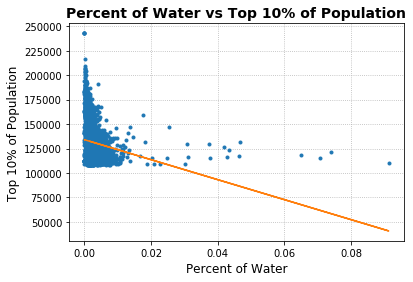

In [81]:
# Sample data
x = pop
y = mean_tt

# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Percent of Water vs Top 10% of Population',fontsize=14,fontweight='bold')
plt.xlabel('Percent of Water',fontsize=12)
plt.ylabel('Top 10% of Population',fontsize=12)
plt.grid(linestyle='dotted')
plt.show()

In [73]:
# Calculate relevant statistical data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r: %f     p: %f     standard error: %f" % (r_value, p_value, std_err))

slope: -1021375.239799    intercept: 134116.324562
r: -0.204245     p: 0.000000     standard error: 85856.196700
